In [ ]:
import numpy as np

def mykmeans(TrainData, K, epsilon=1e-4):
    """
    Υλοποίηση του αλγορίθμου Κ-means.

    Είσοδος:
    TrainData: Πίνακας N x M (δεδομένα προς ταξινόμηση).
    K: Πλήθος των ομάδων (clusters).
    epsilon: Όριο για τον έλεγχο σύγκλισης (default: 1e-4).

    Έξοδος:
    ClusterCenters: Πίνακας K x M (τα κέντρα των ομάδων).
    IDC: Πίνακας N x 1 (τα labels των ομάδων).
    """
    # Αρχικοποίηση
    N, M = TrainData.shape

    # Επιλέγουμε τυχαία K δεδομένα ως αρχικά κέντρα, χωρίς επανατοποθέτηση
    random_indices = np.random.choice(N, K, replace=False)
    ClusterCenters = TrainData[random_indices, :]

    # Δημιουργία πίνακα labels για τα δεδομένα
    IDC = np.zeros(N, dtype=int)

    while True:
        # Αντιγραφή των τρεχόντων κέντρων για έλεγχο σύγκλισης
        old_Centers = ClusterCenters.copy()

        # Υπολογισμός αποστάσεων και εκχώρηση του πλησιέστερου cluster
        for i in range(N):
            distances = np.linalg.norm(TrainData[i] - ClusterCenters, axis=1)
            IDC[i] = np.argmin(distances)

        # Υπολογισμός νέων κέντρων με βάση το μέσο των δεδομένων κάθε cluster
        for k in range(K):
            points_in_cluster = TrainData[IDC == k]
            if len(points_in_cluster) > 0:
                ClusterCenters[k] = points_in_cluster.mean(axis=0)

        # Υπολογισμός της διαφοράς μεταξύ των νέων και παλαιών κέντρων
        center_shift = np.linalg.norm(ClusterCenters - old_Centers)

        # Έλεγχος σύγκλισης με το όριο epsilon
        if center_shift <= epsilon:
            break

    return ClusterCenters, IDC

# Παράδειγμα χρήσης
if __name__ == "__main__":
    # Δημιουργία τυχαίων δεδομένων για δοκιμή
    np.random.seed(42)
    TrainData = np.random.rand(100, 2)  # 100 δεδομένα με 2 χαρακτηριστικά
    K = 3

    ClusterCenters, IDC = mykmeans(TrainData, K, epsilon=1e-3)

    print("Cluster Centers:")
    print(ClusterCenters)
    print("\nLabels:")
    print(IDC)



Cluster Centers:
[[0.8039633  0.57026999]
 [0.18520943 0.72228065]
 [0.36376248 0.20008043]]

Labels:
[1 0 2 1 0 1 0 2 1 2 2 2 1 1 2 2 1 0 2 0 1 1 1 1 2 0 0 0 2 2 2 0 1 1 1 0 1
 0 2 2 0 2 2 0 0 1 0 0 2 2 1 1 0 1 2 2 0 0 0 0 0 2 2 0 1 2 2 0 0 1 0 2 2 0
 2 0 1 0 0 1 1 0 1 2 1 2 2 2 0 0 2 0 1 0 2 1 0 2 0 0]


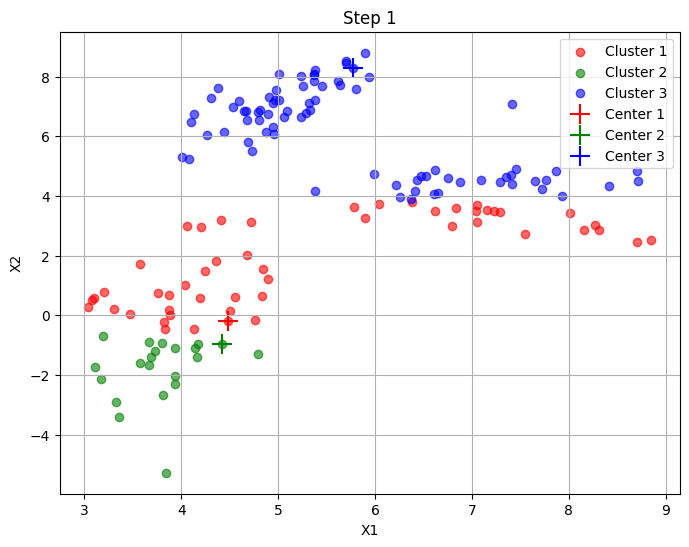

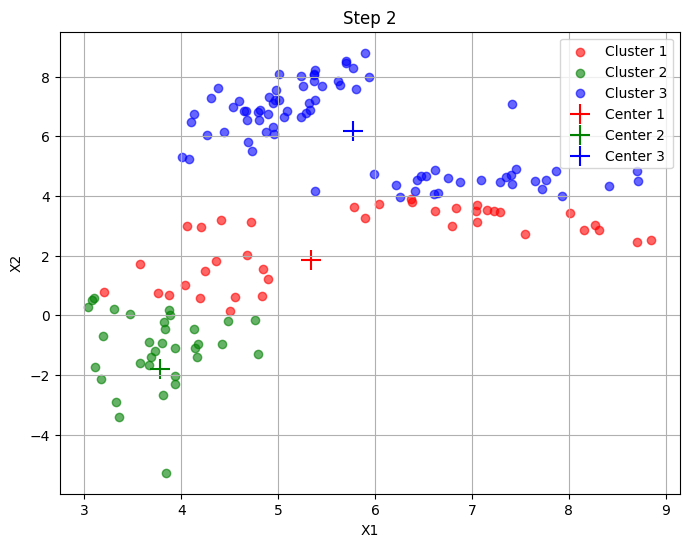

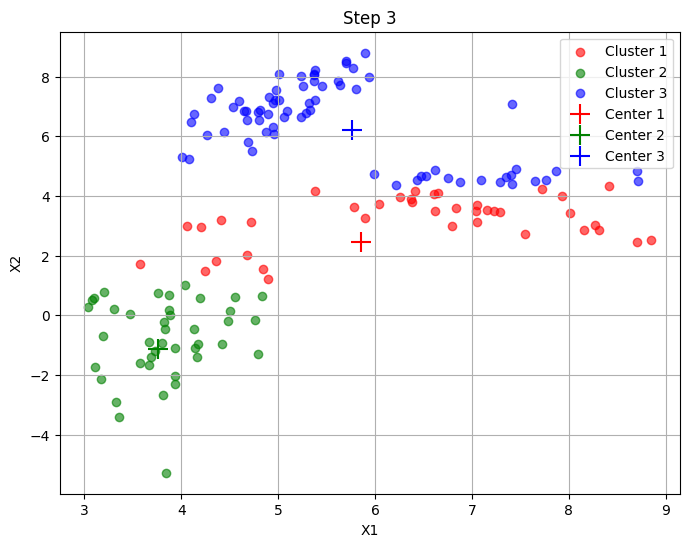

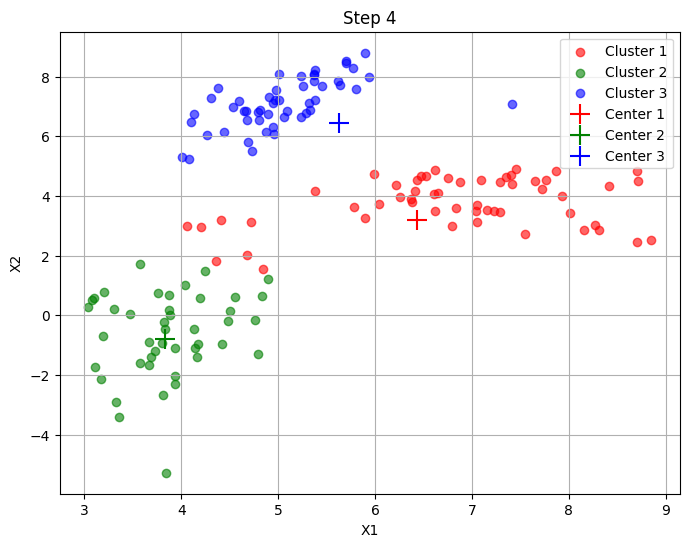

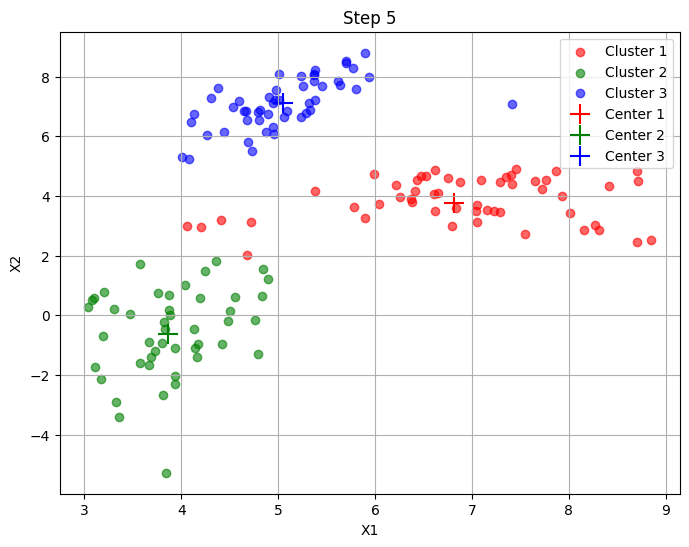

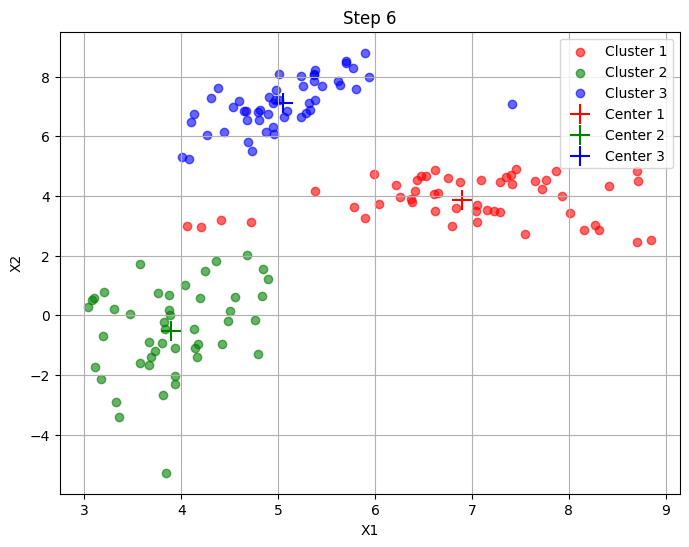

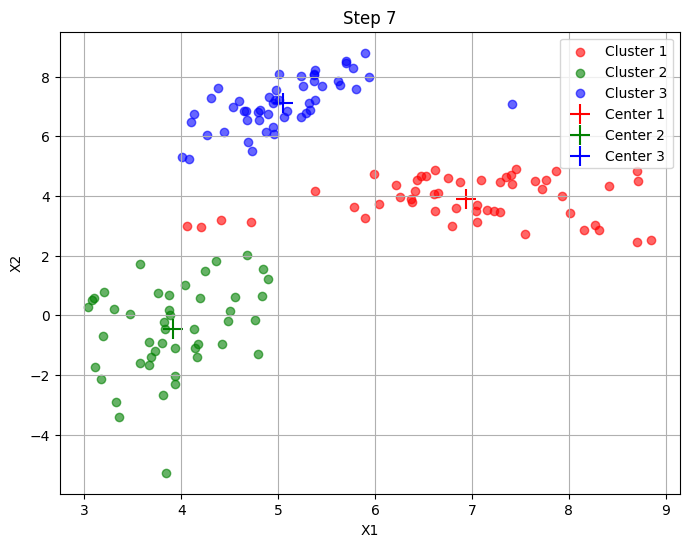

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data():
    # Καθορισμός παραμέτρων των κανονικών κατανομών
    mu1, sigma1 = [4, 0], [[0.29, 0.4], [0.4, 4]]
    mu2, sigma2 = [5, 7], [[0.29, 0.4], [0.4, 0.9]]
    mu3, sigma3 = [7, 4], [[0.64, 0], [0, 0.64]]

    # Δημιουργία 50 σημείων από κάθε κατανομή
    np.random.seed(42)  # Για αναπαραγωγιμότητα
    X1 = np.random.multivariate_normal(mu1, sigma1, 50)
    X2 = np.random.multivariate_normal(mu2, sigma2, 50)
    X3 = np.random.multivariate_normal(mu3, sigma3, 50)

    # Συνένωση δεδομένων
    X = np.vstack((X1, X2, X3))
    return X

def plot_kmeans(TrainData, ClusterCenters_history, IDC_history, K):
    # Δημιουργία γραφήματος
    colors = ['red', 'green', 'blue']
    markers = ['o', 's', '^']

    for step, (centers, labels) in enumerate(zip(ClusterCenters_history, IDC_history)):
        plt.figure(figsize=(8, 6))
        plt.title(f"Step {step + 1}")

        # Σχεδίαση σημείων
        for k in range(K):
            cluster_points = TrainData[np.array(labels) == k]
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[k], label=f"Cluster {k + 1}", alpha=0.6)

        # Σχεδίαση κέντρων
        for k in range(K):
            plt.scatter(centers[k, 0], centers[k, 1], c=colors[k], marker='+', s=200, label=f"Center {k + 1}")

        plt.legend()
        plt.xlabel("X1")
        plt.ylabel("X2")
        plt.grid()
        plt.show()

def mykmeans_with_visualization(TrainData, K):
    # Αρχικοποίηση
    N, M = TrainData.shape
    random_indices = np.random.choice(N, K, replace=False)
    ClusterCenters = TrainData[random_indices, :]
    IDC = np.zeros(N, dtype=int)

    ClusterCenters_history = [ClusterCenters.copy()]
    IDC_history = []

    while True:
        old_Centers = ClusterCenters.copy()

        # Υπολογισμός αποστάσεων και εκχώρηση πλησιέστερου cluster
        for i in range(N):
            distances = np.linalg.norm(TrainData[i] - ClusterCenters, axis=1)
            IDC[i] = np.argmin(distances)

        IDC_history.append(IDC.copy())

        # Υπολογισμός νέων κέντρων
        for k in range(K):
            points_in_cluster = TrainData[IDC == k]
            if len(points_in_cluster) > 0:
                ClusterCenters[k] = points_in_cluster.mean(axis=0)

        ClusterCenters_history.append(ClusterCenters.copy())

        # Έλεγχος σύγκλισης
        if np.allclose(ClusterCenters, old_Centers):
            break

    return ClusterCenters, IDC, ClusterCenters_history, IDC_history

if __name__ == "__main__":
    # Δημιουργία δεδομένων
    TrainData = generate_data()
    K = 3

    # Τρέξιμο του K-means με οπτικοποίηση
    ClusterCenters, IDC, ClusterCenters_history, IDC_history = mykmeans_with_visualization(TrainData, K)

    # Δημιουργία γραφημάτων για κάθε βήμα
    plot_kmeans(TrainData, ClusterCenters_history, IDC_history, K)


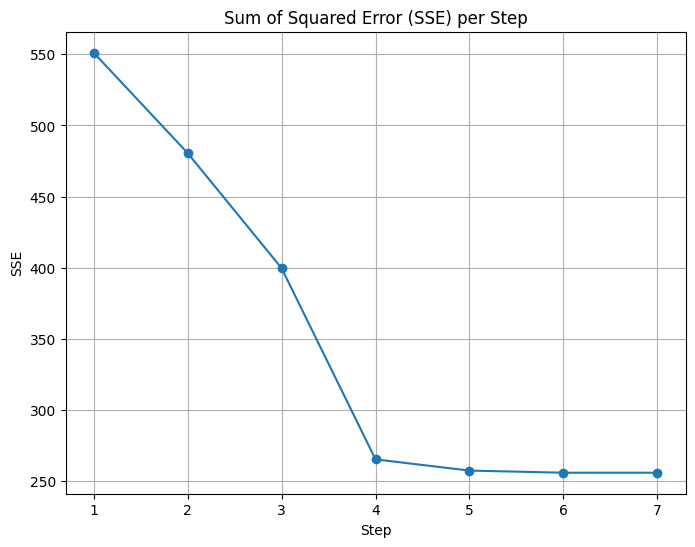

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def compute_sse(TrainData, ClusterCenters, IDC):
    """
    Υπολογισμός του Sum of Squared Error (SSE)
    SSE = Σ_i Σ_x∈C_i ||x - Ci||^2
    """
    sse = 0
    for k in range(ClusterCenters.shape[0]):
        cluster_points = TrainData[IDC == k]
        sse += np.sum(np.linalg.norm(cluster_points - ClusterCenters[k], axis=1) ** 2)
    return sse

def mykmeans_with_sse(TrainData, K):
    # Αρχικοποίηση
    N, M = TrainData.shape
    random_indices = np.random.choice(N, K, replace=False)
    ClusterCenters = TrainData[random_indices, :]
    IDC = np.zeros(N, dtype=int)

    SSE_history = []  # Ιστορικό για το SSE

    while True:
        old_Centers = ClusterCenters.copy()

        # Υπολογισμός αποστάσεων και εκχώρηση πλησιέστερου cluster
        for i in range(N):
            distances = np.linalg.norm(TrainData[i] - ClusterCenters, axis=1)
            IDC[i] = np.argmin(distances)

        # Υπολογισμός νέων κέντρων
        for k in range(K):
            points_in_cluster = TrainData[IDC == k]
            if len(points_in_cluster) > 0:
                ClusterCenters[k] = points_in_cluster.mean(axis=0)

        # Υπολογισμός SSE
        sse = compute_sse(TrainData, ClusterCenters, IDC)
        SSE_history.append(sse)

        # Έλεγχος σύγκλισης
        if np.allclose(ClusterCenters, old_Centers):
            break

    return SSE_history

def plot_sse(SSE_history):
    """
    Σχεδίαση του SSE για κάθε βήμα του K-means
    """
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(SSE_history) + 1), SSE_history, marker='o', linestyle='-')
    plt.title("Sum of Squared Error (SSE) per Step")
    plt.xlabel("Step")
    plt.ylabel("SSE")
    plt.grid()
    plt.show()

if __name__ == "__main__":
    # Δημιουργία δεδομένων
    TrainData = generate_data()
    K = 3

    # Τρέξιμο του K-means με υπολογισμό του SSE
    SSE_history = mykmeans_with_sse(TrainData, K)

    # Σχεδίαση γραφήματος για το SSE
    plot_sse(SSE_history)





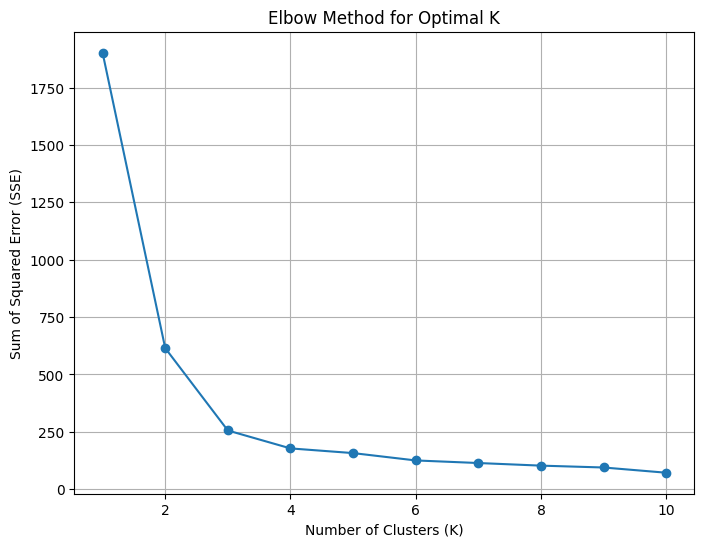

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def compute_sse(TrainData, ClusterCenters, IDC):
    """
    Υπολογισμός του Sum of Squared Error (SSE)
    """
    sse = 0
    for k in range(ClusterCenters.shape[0]):
        cluster_points = TrainData[IDC == k]
        sse += np.sum(np.linalg.norm(cluster_points - ClusterCenters[k], axis=1) ** 2)
    return sse

def mykmeans(TrainData, K):
    """
    Εκτέλεση K-means και επιστροφή των κέντρων και των αναθέσεων IDC
    """
    N, M = TrainData.shape
    random_indices = np.random.choice(N, K, replace=False)
    ClusterCenters = TrainData[random_indices, :]
    IDC = np.zeros(N, dtype=int)

    while True:
        old_Centers = ClusterCenters.copy()

        # Υπολογισμός αποστάσεων και εκχώρηση πλησιέστερου cluster
        for i in range(N):
            distances = np.linalg.norm(TrainData[i] - ClusterCenters, axis=1)
            IDC[i] = np.argmin(distances)

        # Υπολογισμός νέων κέντρων
        for k in range(K):
            points_in_cluster = TrainData[IDC == k]
            if len(points_in_cluster) > 0:
                ClusterCenters[k] = points_in_cluster.mean(axis=0)

        # Έλεγχος σύγκλισης
        if np.allclose(ClusterCenters, old_Centers):
            break

    return ClusterCenters, IDC

def elbow_method(TrainData, max_K):
    """
    Υλοποίηση της μεθόδου Elbow
    """
    SSE_values = []
    K_values = range(1, max_K + 1)

    for K in K_values:
        ClusterCenters, IDC = mykmeans(TrainData, K)
        sse = compute_sse(TrainData, ClusterCenters, IDC)
        SSE_values.append(sse)

    return K_values, SSE_values

def plot_elbow(K_values, SSE_values):
    """
    Σχεδίαση του γραφήματος Elbow
    """
    plt.figure(figsize=(8, 6))
    plt.plot(K_values, SSE_values, marker='o', linestyle='-')
    plt.title("Elbow Method for Optimal K")
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Sum of Squared Error (SSE)")
    plt.grid()
    plt.show()

if __name__ == "__main__":
    # Δημιουργία δεδομένων από τον προηγούμενο κώδικα
    def generate_data():
        mu1, sigma1 = [4, 0], [[0.29, 0.4], [0.4, 4]]
        mu2, sigma2 = [5, 7], [[0.29, 0.4], [0.4, 0.9]]
        mu3, sigma3 = [7, 4], [[0.64, 0], [0, 0.64]]

        np.random.seed(42)
        X1 = np.random.multivariate_normal(mu1, sigma1, 50)
        X2 = np.random.multivariate_normal(mu2, sigma2, 50)
        X3 = np.random.multivariate_normal(mu3, sigma3, 50)
        X = np.vstack((X1, X2, X3))
        return X

    TrainData = generate_data()

    # Εύρος τιμών για το K
    max_K = 10

    # Εφαρμογή της μεθόδου Elbow
    K_values, SSE_values = elbow_method(TrainData, max_K)

    # Σχεδίαση του γραφήματος Elbow
    plot_elbow(K_values, SSE_values)

